# (Ford Gobike Data Exploration)
## by (Shaikha Bin Ateeq)

## Investigation Overview

> In this Ford Go Bike Data Analysis, I'd want to look into how user behavior affects bike rentals. The main goal was to see how various dataset characteristics like age, start and finish stations, user type, and gender influenced trip duration.  also the demand among certain user types

## Dataset Overview

> As my source data, I selected Ford GoBike System Data. This data collection contains information about individual bike-sharing system trips. The dataset includes the following features: Start Station ID, Start Station Name, Start Station Latitude, Start Station Longitude, End Station ID, End Station Name, End Station Latitude, End Station Longitude, Bike ID, User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual), Member Year of Birth, Member Gender

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas data 
df = pd.read_csv('Ford-Gobike-Data-Exploration.csv')

In [7]:
#cleaning ;
df = df[df['member_gender'].isnull() == False]
df = df[df['start_station_id'].isnull() == False]
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['duration_in_minute'] = df['duration_sec']/60
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')
df['start_day_of_week'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')
df['member_age'] = 2019 - df['member_birth_year']
df = df[df['member_age'] <= 60]
df.member_age = df.member_age.astype('int')
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(monthcat)
days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayscat = pd.api.types.CategoricalDtype(ordered=True, categories=days_ordered)
df['start_day_of_week'] = df['start_day_of_week'].astype(dayscat)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Weekdays' member age and the  weekly usage)

> Overall, subscribers used the service far more than casual customers. The decrease in volume for subscribers on weekends suggests that they mostly ride bikes for work commutes during the week, whereas the nearly opposite pattern of a slight improvement in use for consumers on weekends indicates that they ride bikes for entertainment.also The riders who rented bikes on workdays  are slightly older than those who rode on weekend days.and thats indicate who ride in weeend they are  younger and they ride the bikes for enjoyments 

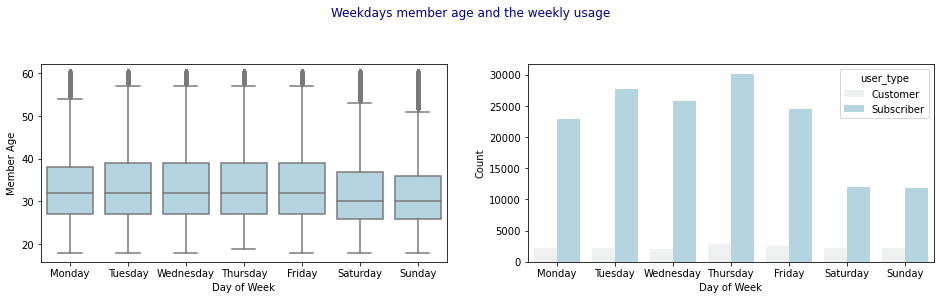

In [8]:
plt.suptitle('Weekdays member age and the weekly usage ',color='darkblue')

plt.subplot(221);
sb.boxplot(data=df, x='start_day_of_week', y='member_age', color = 'lightblue');
plt.xlabel('Day of Week');
plt.ylabel('Member Age');
plt.gcf().set_size_inches(16,8)


plt.subplot(222);
sb.countplot(data=df, x='start_day_of_week', hue='user_type',color = 'lightblue');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.gcf().set_size_inches(16,8)

## (Weekday Hourly Usage for Customers and Subscriber)

> The heatmaps clearly demonstrate that the two types of riders have extremely distinct usage habits and behaviors. Subscribers made heavy use of the system during the workday, i.e. Customers ride a lot on weekends, especially in the afternoons, as opposed to Monday through Friday. When used for work commutes, many trips focused around 8-9 a.m. and 17-18 p.m. on work days for subscribers, although customers tend to use more in the late afternoon around 17 p.m. Monday through Friday. It might also be related to the traffic situation in the region during these peak hours, aside from usage goal and habit.

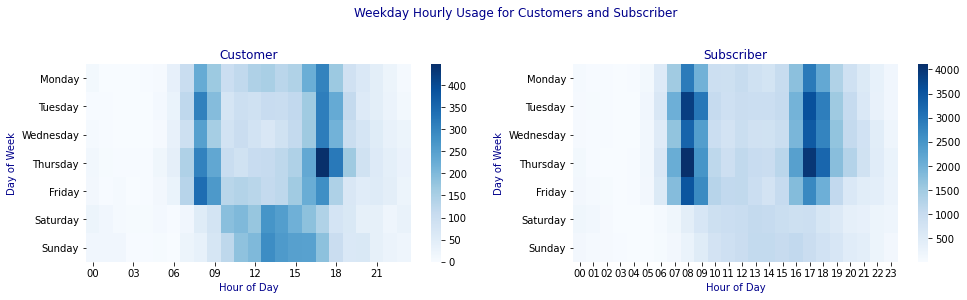

In [9]:
plt.suptitle('Weekday Hourly Usage for Customers and Subscriber ',color='darkblue')

plt.subplot(221);
customers = df.query('user_type == "Customer"')
c = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
c = c.reset_index(name='count')
c = c.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(c, cmap='Blues');
plt.title('Customer',color='darkblue');
plt.xlabel('Hour of Day', color='darkblue');
plt.ylabel('Day of Week', color='darkblue');
plt.gcf().set_size_inches(16,8)


plt.subplot(222);
Subscriber = df.query('user_type == "Subscriber"')
c = Subscriber.groupby(['start_day_of_week', 'start_hour_of_day']).size()
c = c.reset_index(name='count')
c = c.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(c, cmap='Blues');
plt.title('Subscriber',color='darkblue');
plt.xlabel('Hour of Day', color='darkblue');
plt.ylabel('Day of Week', color='darkblue');
plt.gcf().set_size_inches(16,8)


## ( On weekdays, how does the average trip duration differ between customers and subscribers)

> Subscribers take far shorter/quicker journeys than consumers on each day of the week, as shown in the graph above. On Saturdays and Sundays, almost all user categories had much longer trips than on weekends, particularly casual riders. Subscribers appear to be more practical than customers in general, with a regular average length from Monday to Friday.


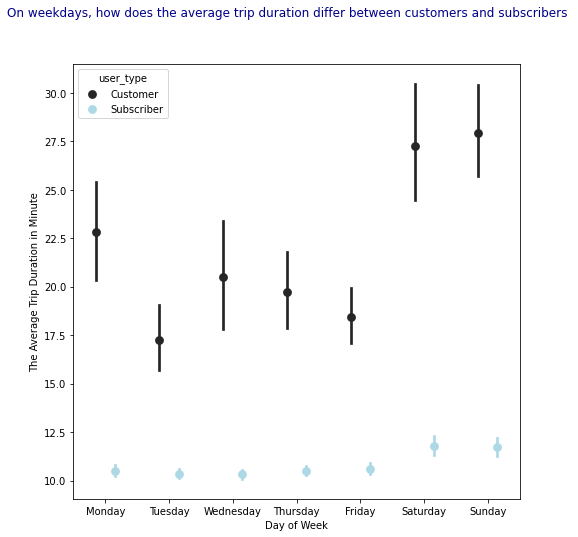

In [10]:
plt.suptitle('On weekdays, how does the average trip duration differ between customers and subscribers ',color='darkblue')
sb.pointplot(data=df, x='start_day_of_week', y='duration_in_minute', hue='user_type', dodge=0.3, linestyles="", color = 'lightblue');
plt.xlabel('Day of Week');
plt.ylabel('The Average Trip Duration in Minute');
plt.gcf().set_size_inches(8,8)


## ( Summary) 

> Overall, there were a lot more subscribers utilizing the bike sharing system than casual customers. Obviously, the two categories of bikers have distinguishable usage patterns and riding behaviors. Subscribers utilized the system significantly on work days, focused around 8-9 a.m. and 17-18 p.m. for work commutes, and they are significantly older, whereas consumers ride a lot on weekends in the afternoon for entertainment purposes. Subscribers have considerably shorter/quicker journeys than consumers, which makes subscriber use more efficient because they go to work on a regular schedule.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [11]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 